In [3]:
#data loading
import pandas as pd
filename="/content/RecreationDemand.csv"
a=pd.read_csv(str(filename))

print(a)

     rownames  trips  quality  ski  income userfee  costC   costS   costH
0           1      0        0  yes       4      no  67.59  68.620  76.800
1           2      0        0   no       9      no  68.86  70.936  84.780
2           3      0        0  yes       5      no  58.12  59.465  72.110
3           4      0        0   no       2      no  15.79  13.750  23.680
4           5      0        0  yes       3      no  24.02  34.033  34.547
..        ...    ...      ...  ...     ...     ...    ...     ...     ...
654       655     40        5  yes       5     yes  25.63  18.916  29.684
655       656     40        3  yes       3      no  18.46  13.330  25.800
656       657     40        2  yes       4      no  58.84  47.000  62.760
657       658     50        4  yes       4      no  35.67  25.694  37.269
658       659     88        2   no       2      no  22.49   6.210  25.460

[659 rows x 9 columns]


In [4]:
##Checking for null values
a.isna().sum()

,0
rownames,0
trips,0
quality,0
ski,0
income,0
userfee,0
costC,0
costS,0
costH,0


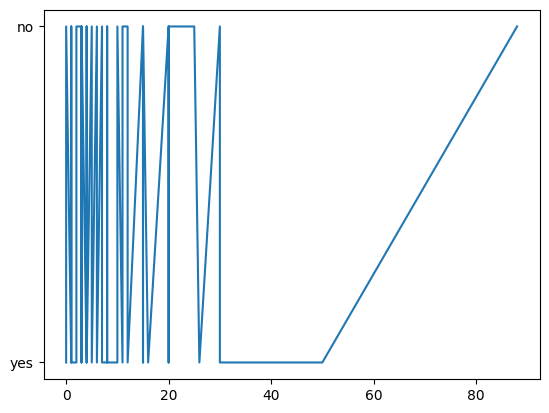

In [6]:
from matplotlib import pyplot as plt
target="ski"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 659 artists>

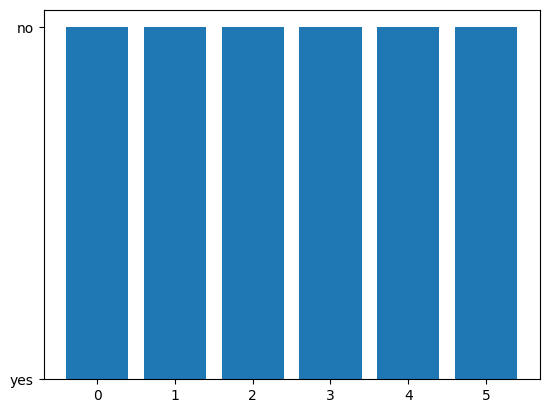

In [7]:
plt.bar(a[a.columns[2]],a[str(target)])

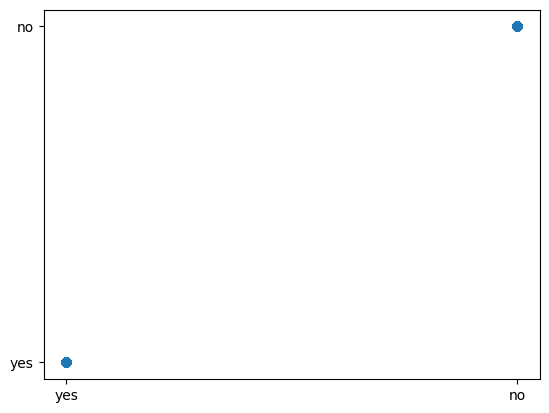

In [8]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [11]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={3,5}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

     rownames  trips  quality  ski  income  userfee  costC   costS   costH
0           1      0        0    1       4        0  67.59  68.620  76.800
1           2      0        0    0       9        0  68.86  70.936  84.780
2           3      0        0    1       5        0  58.12  59.465  72.110
3           4      0        0    0       2        0  15.79  13.750  23.680
4           5      0        0    1       3        0  24.02  34.033  34.547
..        ...    ...      ...  ...     ...      ...    ...     ...     ...
654       655     19        5    1       5        1  25.63  18.916  29.684
655       656     19        3    1       3        0  18.46  13.330  25.800
656       657     19        2    1       4        0  58.84  47.000  62.760
657       658     20        4    1       4        0  35.67  25.694  37.269
658       659     21        2    0       2        0  22.49   6.210  25.460

[659 rows x 9 columns]


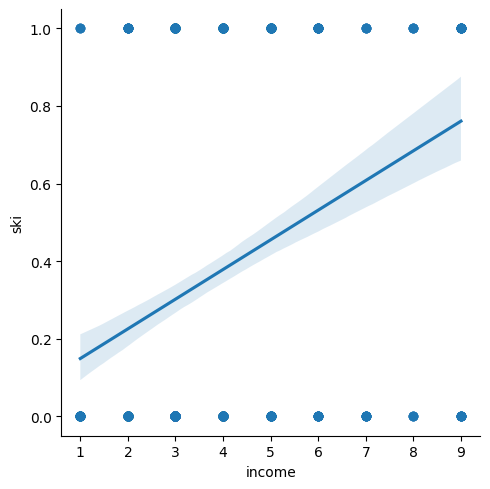

In [12]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="income",y=str(target),data=a)

<Axes: xlabel='userfee', ylabel='ski'>

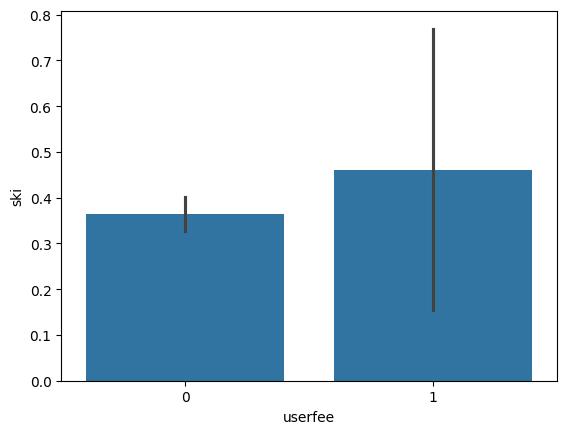

In [13]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='education', ylabel='case'>

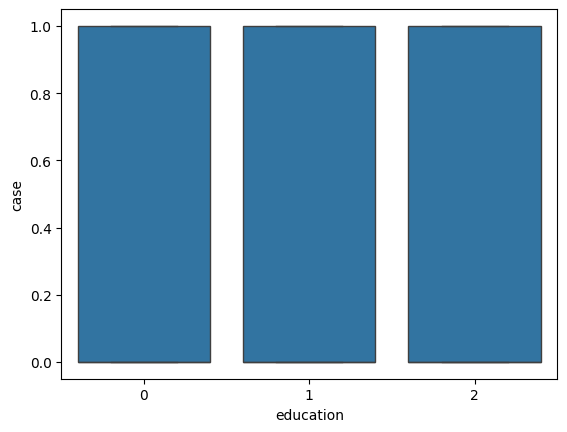

In [ ]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-14-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='ski', ylabel='Density'>

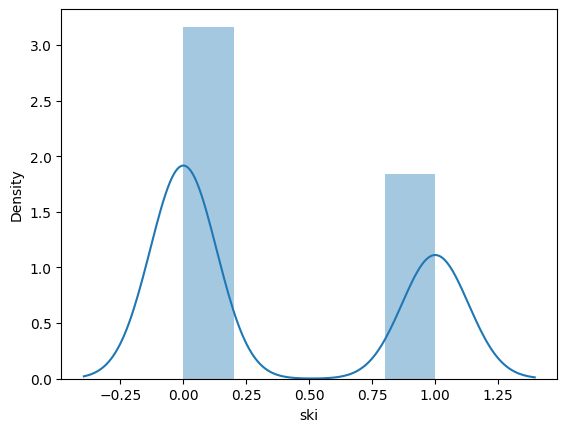

In [14]:
sns.distplot(a[str(target)])

<Axes: xlabel='trips', ylabel='Density'>

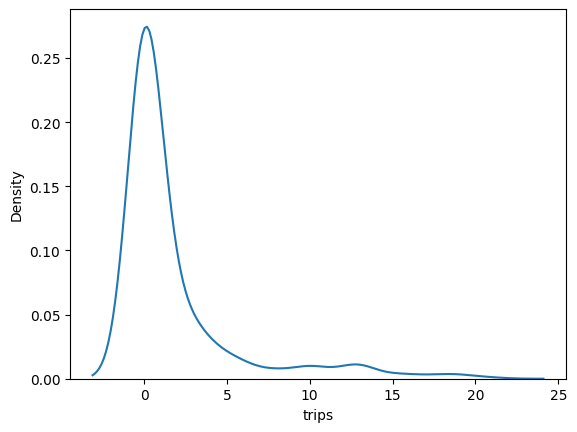

In [15]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='income', ylabel='count'>

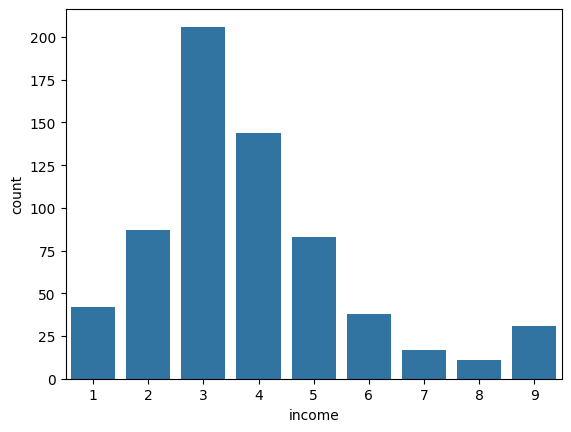

In [16]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

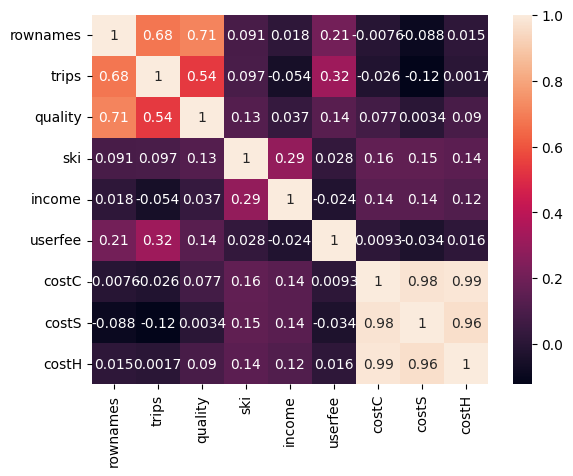

In [17]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()
sns.heatmap(data, annot=True)

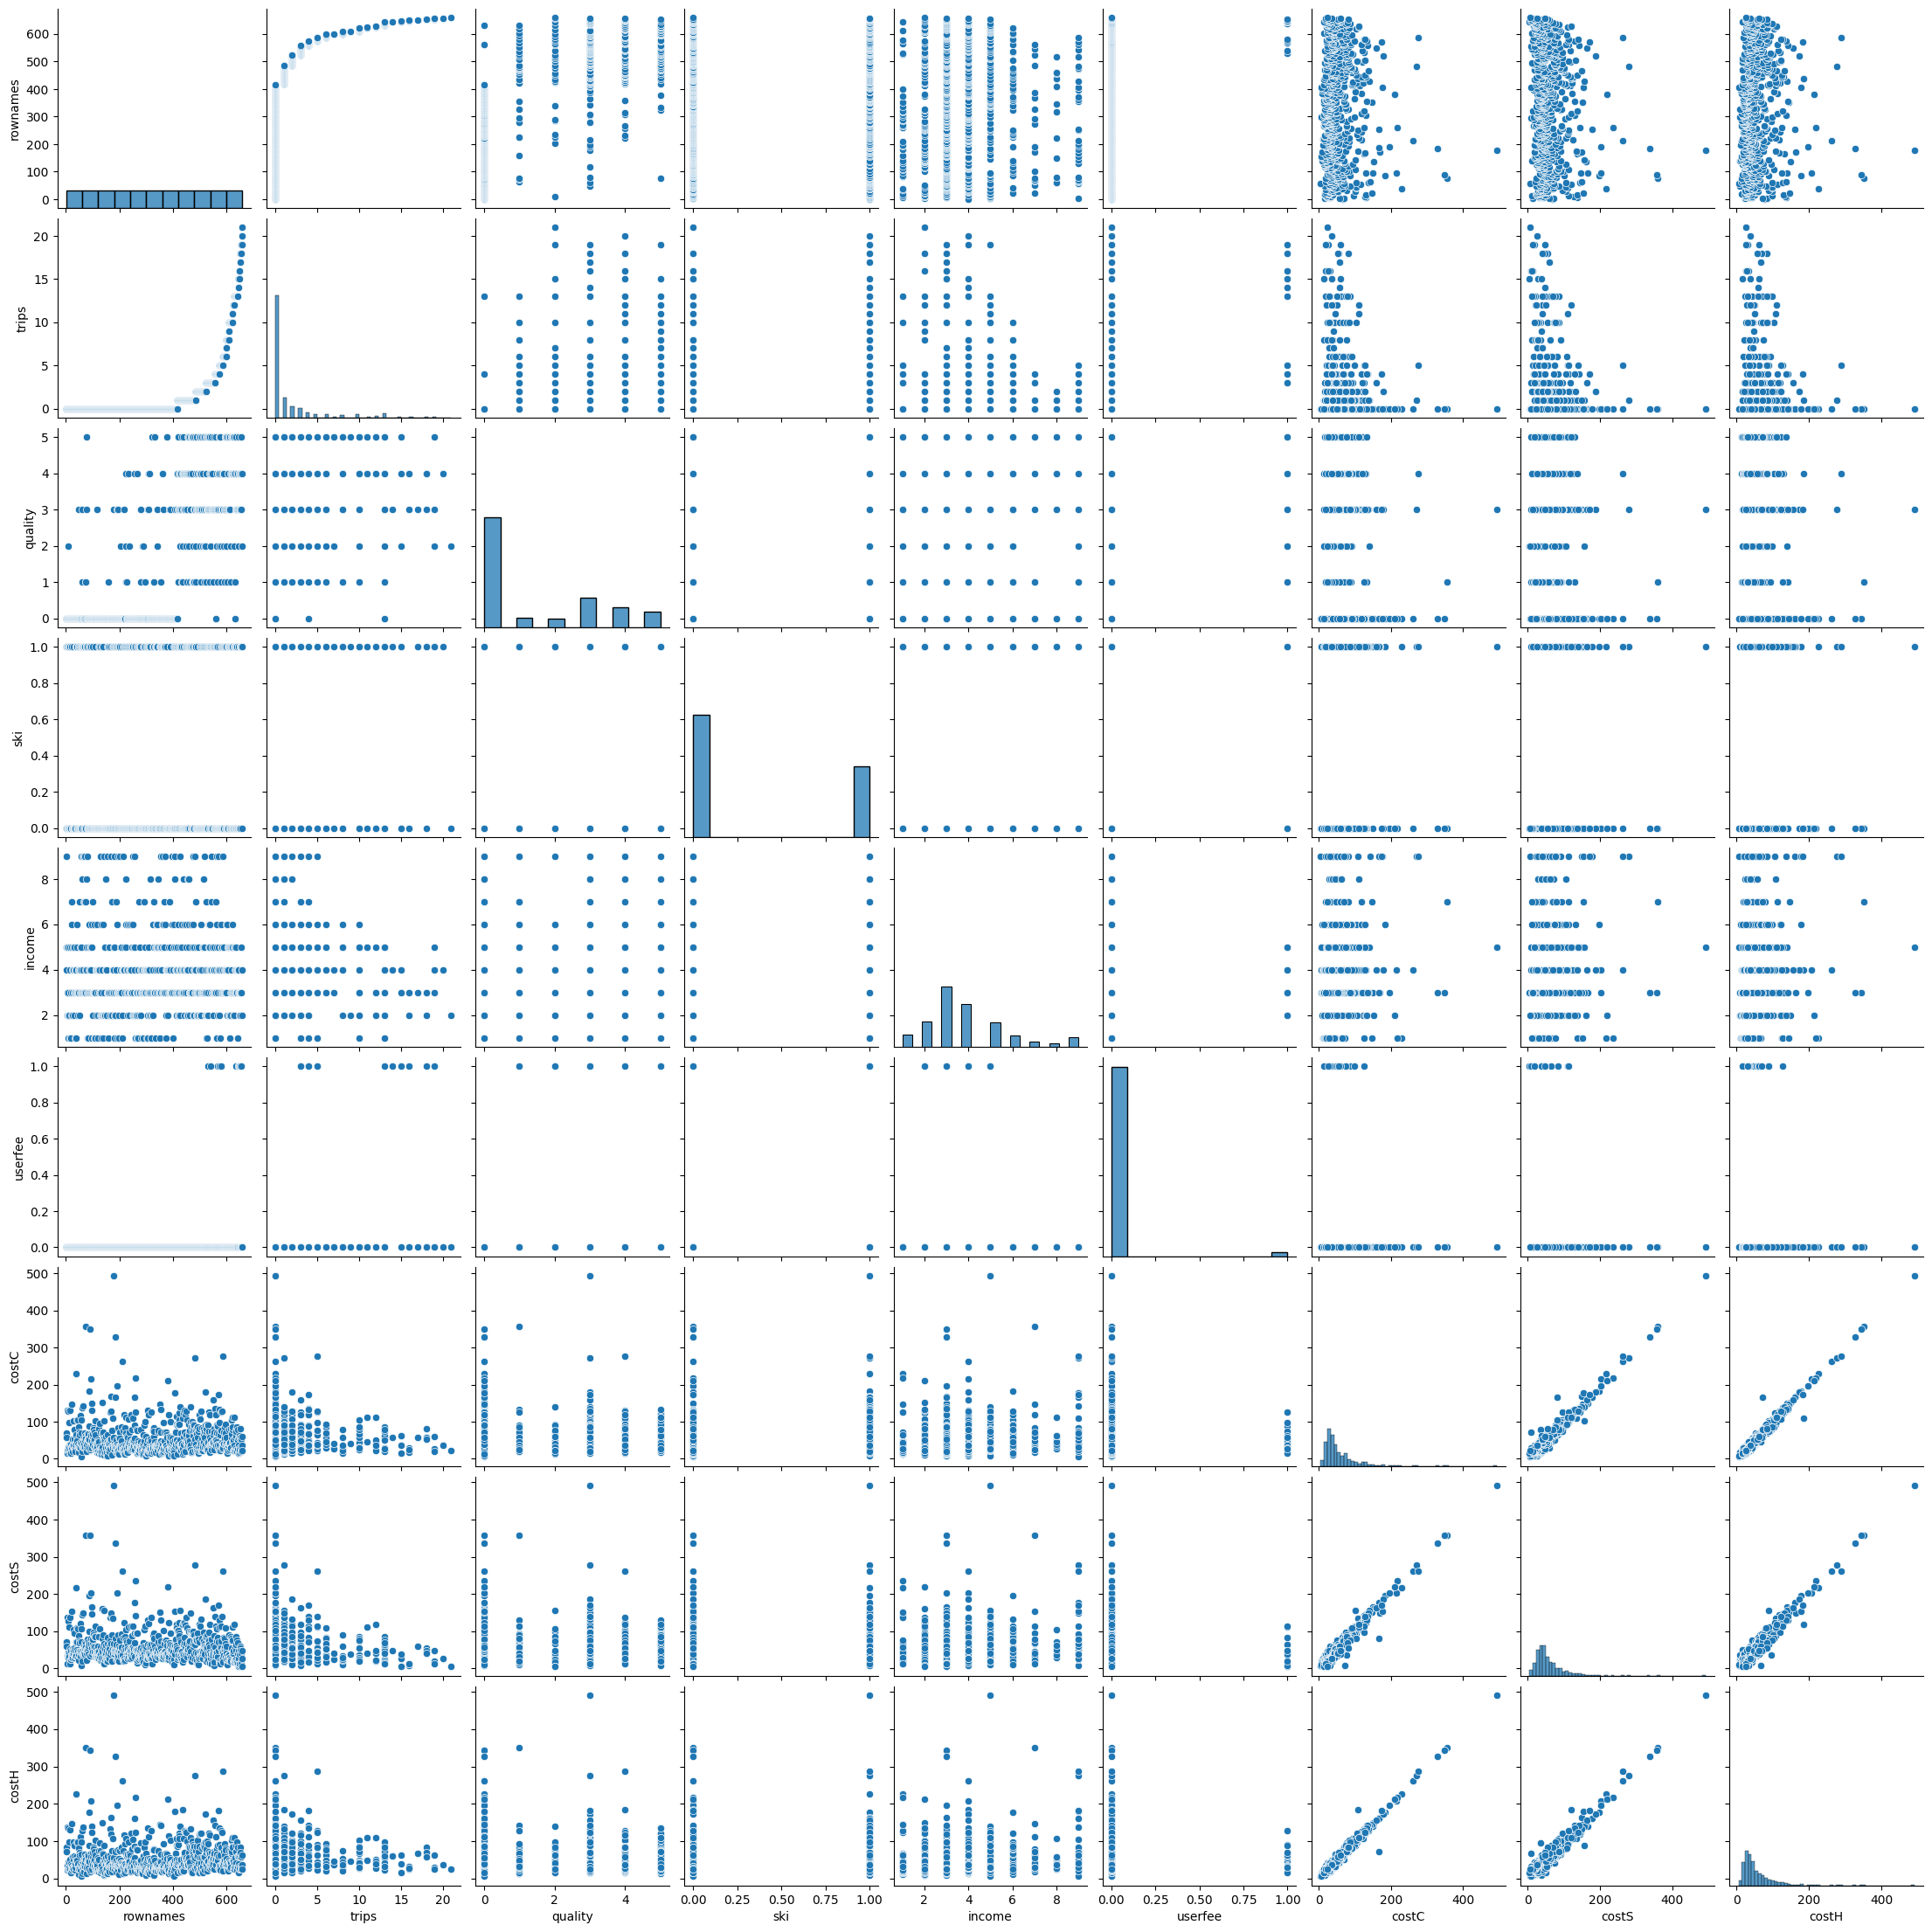

In [18]:
sns.pairplot(data=a)

In [19]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

     rownames  trips  quality  income  userfee  costC   costS   costH
0           1      0        0       4        0  67.59  68.620  76.800
1           2      0        0       9        0  68.86  70.936  84.780
2           3      0        0       5        0  58.12  59.465  72.110
3           4      0        0       2        0  15.79  13.750  23.680
4           5      0        0       3        0  24.02  34.033  34.547
..        ...    ...      ...     ...      ...    ...     ...     ...
654       655     19        5       5        1  25.63  18.916  29.684
655       656     19        3       3        0  18.46  13.330  25.800
656       657     19        2       4        0  58.84  47.000  62.760
657       658     20        4       4        0  35.67  25.694  37.269
658       659     21        2       2        0  22.49   6.210  25.460

[659 rows x 8 columns]


In [20]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
654    1
655    1
656    1
657    1
658    0
Name: ski, Length: 659, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
print(x_train)

     rownames  trips  quality  income  userfee  costC   costS   costH
373       374      0        0       2        0  37.21  39.713  30.300
558       559      4        5       3        0  35.37  40.867  36.027
210       211      0        0       2        0  25.19  37.290  31.680
446       447      1        3       3        0  19.29  35.350  33.480
561       562      4        3       9        0  69.32  77.540  61.800
..        ...    ...      ...     ...      ...    ...     ...     ...
463       464      1        4       3        0  35.09  44.550  29.480
622       623     11        4       5        0  45.53  40.817  49.700
441       442      1        3       4        0  68.39  68.147  65.560
403       404      0        0       3        0  16.83  25.350  21.437
311       312      0        0       3        0  26.62  37.550  27.430

[527 rows x 8 columns]


In [23]:
print(y_train)

373    0
558    0
210    0
446    0
561    0
      ..
463    1
622    1
441    0
403    0
311    1
Name: ski, Length: 527, dtype: int64


In [26]:
print(x_test)

     rownames  trips  quality  income  userfee   costC    costS    costH
454       455      1        5       2        0   43.00   56.450   52.160
179       180      0        0       2        0   40.23   51.317   42.480
117       118      0        0       2        0   49.35   59.980   48.489
59         60      0        0       3        0  138.28  143.724  127.200
445       446      1        4       3        0   45.00   57.250   53.380
..        ...    ...      ...     ...      ...     ...      ...      ...
563       564      4        2       1        0   44.88   42.236   65.820
647       648     16        3       2        1   29.78    8.325   32.800
500       501      2        2       2        0   45.69   42.697   55.690
44         45      0        0       3        0  104.54  106.420   97.880
552       553      3        5       5        0   81.14   88.230   71.710

[132 rows x 8 columns]


In [25]:
print(y_test)

454    0
179    0
117    0
59     1
445    0
      ..
563    0
647    0
500    0
44     0
552    1
Name: ski, Length: 132, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print(ypred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1]


In [29]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6287878787878788


In [30]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[66 11]
 [38 17]]


In [32]:
print(model.predict([[455,1,5,2,0,43.00,56.450,52.160]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0]


In [35]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6060606060606061


In [36]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[56 21]
 [31 24]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        77
           1       0.53      0.44      0.48        55

    accuracy                           0.61       132
   macro avg       0.59      0.58      0.58       132
weighted avg       0.60      0.61      0.60       132



In [38]:
print(model.predict([[96,2,31,1,0,0,13,9]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [40]:
print(ypred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1]


In [41]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6818181818181818


In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[67 10]
 [32 23]]


In [43]:
print(model.predict([[96,2,31,1,0,0,13,9]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        77
           1       0.70      0.42      0.52        55

    accuracy                           0.68       132
   macro avg       0.69      0.64      0.64       132
weighted avg       0.69      0.68      0.66       132

